In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
sentiment = pd.read_csv("C:\\Users\\yamni\\OneDrive\\Desktop\\data_set\\fear_greed_index.csv")
trades = pd.read_csv("C:\\Users\\yamni\\OneDrive\\Desktop\\data_set\\historical_data.csv")

In [3]:
# reading the files
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
#Analyzing each column
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
sentiment.shape

(2644, 4)

In [7]:
# NO NULL VALUES IN SENTIMENT
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [8]:
# NO DUPLICATE VALUE
sentiment.duplicated().sum()

np.int64(0)

In [9]:
# same for trade
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [10]:
trades.duplicated().sum()

np.int64(0)

In [11]:
#Convert timestamps and align the datasets by date (daily level is fine).
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.normalize()
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [12]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)
trades['date'] = trades['Timestamp IST'].dt.normalize()
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [13]:
# merging the datasets
merged = trades.merge(sentiment[['date', 'classification']],on='date',how='left')
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [14]:
# Group by Account and Date to create daily trader metrics
daily_trader = merged.groupby(['Account', 'date']).agg(
    
    # Performance metric
    daily_pnl=('Closed PnL', 'sum'),
    
    # Activity metric
    trades_per_day=('Trade ID', 'count'),
    
    # Capital exposure metrics
    total_volume_usd=('Size USD', 'sum'),
    avg_trade_size_usd=('Size USD', 'mean'),
    
    # Directional behavior
    buy_trades=('Side', lambda x: (x == 'BUY').sum()),
    sell_trades=('Side', lambda x: (x == 'SELL').sum())
    
).reset_index()
daily_trader.head()

,Account,date,daily_pnl,trades_per_day,total_volume_usd,avg_trade_size_usd,buy_trades,sell_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,900880.13,5089.718249,0,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,542413.18,7976.664412,0,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,949380.00,23734.500000,0,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,338240.00,28186.666667,12,0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,465700.00,17248.148148,12,15


In [15]:
#Create Long/Short Ratio to Measure directional bias of traders.
daily_trader['long_short_ratio'] = (daily_trader['buy_trades'] /(daily_trader['buy_trades'] + daily_trader['sell_trades']))
daily_trader.head()

,Account,date,daily_pnl,trades_per_day,total_volume_usd,avg_trade_size_usd,buy_trades,sell_trades,long_short_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,900880.13,5089.718249,0,177,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,542413.18,7976.664412,0,68,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,949380.00,23734.500000,0,40,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,338240.00,28186.666667,12,0,1.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,465700.00,17248.148148,12,15,0.444444


In [16]:
# Create Win Rate to Measure consistency of traders.
# Create win indicator per day
daily_trader['win_day'] = daily_trader['daily_pnl'] > 0

# Aggregate at trader level
trader_stats = daily_trader.groupby('Account').agg(
    total_pnl=('daily_pnl', 'sum'),
    total_days=('date', 'count'),
    win_days=('win_day', 'sum'),
    avg_daily_pnl=('daily_pnl', 'mean'),
    pnl_volatility=('daily_pnl', 'std'),
    avg_trades_per_day=('trades_per_day', 'mean'),
    avg_trade_size=('avg_trade_size_usd', 'mean'),
    avg_daily_volume=('total_volume_usd', 'mean')
).reset_index()

# Win rate
trader_stats['win_rate'] = trader_stats['win_days'] / trader_stats['total_days']

In [17]:
#Since the dataset does not contain margin or account equity information, true leverage cannot be computed. 
#Therefore, we construct a proxy for leverage using average trade size and daily trading volume,
#which capture exposure intensity and risk-taking behavior.

# Create exposure intensity proxy
trader_stats['exposure_score'] = (
    trader_stats['avg_trade_size'] *
    trader_stats['avg_daily_volume']
)

# Segment traders based on exposure
trader_stats['exposure_segment'] = pd.qcut(
    trader_stats['exposure_score'],
    q=2,
    labels=['Low Exposure', 'High Exposure']
)

In [18]:
#Number of Trades Per Day (Overall View) To analyze behavior under sentiment:
sentiment_behavior = daily_trader.merge(
    merged[['date', 'classification']].drop_duplicates(),
    on='date',
    how='left'
)

sentiment_summary = sentiment_behavior.groupby('classification').agg(
    avg_daily_pnl=('daily_pnl', 'mean'),
    avg_trades=('trades_per_day', 'mean'),
    avg_trade_size=('avg_trade_size_usd', 'mean'),
    avg_long_ratio=('long_short_ratio', 'mean')
).reset_index()

In [19]:
daily_trader.head()


,Account,date,daily_pnl,trades_per_day,total_volume_usd,avg_trade_size_usd,buy_trades,sell_trades,long_short_ratio,win_day
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,900880.13,5089.718249,0,177,0.000000,False
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,542413.18,7976.664412,0,68,0.000000,False
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,949380.00,23734.500000,0,40,0.000000,False
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,338240.00,28186.666667,12,0,1.000000,False
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,465700.00,17248.148148,12,15,0.444444,True


In [20]:
trader_stats.head()

,Account,total_pnl,total_days,win_days,avg_daily_pnl,pnl_volatility,avg_trades_per_day,avg_trade_size,avg_daily_volume,win_rate,exposure_score,exposure_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06,24,16,66676.242499,150401.797346,159.083333,33569.102224,2.570719e+06,0.666667,8.629674e+10,High Exposure
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,4.788532e+04,52,29,920.871548,3603.042291,140.000000,4359.830930,2.314517e+05,0.557692,1.009090e+09,High Exposure
2,0x271b280974205ca63b716753467d5a371de622ab,-7.043619e+04,12,8,-5869.682610,33420.410014,317.416667,11057.118419,2.822787e+06,0.666667,3.121189e+10,High Exposure
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.324648e+05,162,144,817.684040,2993.284702,82.166667,484.844294,4.171001e+04,0.888889,2.022286e+07,Low Exposure
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1.686580e+05,69,54,2444.318913,4867.743469,46.942029,2553.757037,1.473461e+05,0.782609,3.762861e+08,Low Exposure


## Part B

In [21]:
#Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?
#  Compare Average Daily PnL
pnl_comparison = sentiment_behavior.groupby('classification').agg(
    avg_daily_pnl=('daily_pnl', 'mean'),
    median_daily_pnl=('daily_pnl', 'median'),
    pnl_volatility=('daily_pnl', 'std')
).reset_index()

pnl_comparison

,classification,avg_daily_pnl,median_daily_pnl,pnl_volatility
0,Extreme Fear,4619.439053,218.377399,29534.839183
1,Extreme Greed,5161.922644,418.319862,27496.863832
2,Fear,5328.818161,107.892532,31659.771538
3,Greed,3318.100730,158.214922,30599.040173
4,Neutral,3438.618818,167.551743,17447.863645


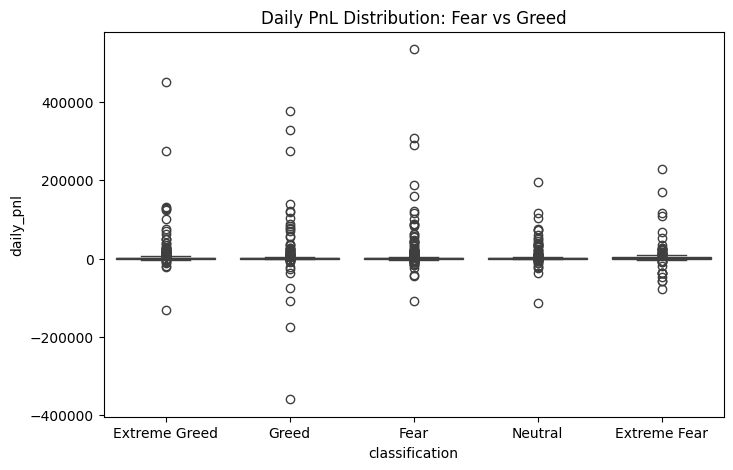

In [22]:
#Visualize Daily PnL Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=sentiment_behavior, x='classification', y='daily_pnl')
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.show()

#### Interpretation of Daily PnL Distribution

Median daily PnL remains close to zero across all sentiment regimes, indicating no strong average profitability shift solely due to sentiment.
However, dispersion of daily PnL increases during strong sentiment regimes (Fear and Greed), suggesting increased volatility in trader performance.
Extreme profit and loss outliers are more frequent during high sentiment periods, indicating elevated risk-taking behavior.
Neutral periods exhibit comparatively lower performance dispersion, implying more stable trading outcomes.
Overall, sentiment appears to influence risk distribution more than average profitability.

In [23]:
#  win rate per sentiment:

win_rate_sentiment =sentiment_behavior.groupby('classification')['win_day'].mean().reset_index()
win_rate_sentiment.rename(columns={'win_day':'win_rate'}, inplace=True)

win_rate_sentiment

,classification,win_rate
0,Extreme Fear,0.600000
1,Extreme Greed,0.682510
2,Fear,0.604762
3,Greed,0.611111
4,Neutral,0.622340


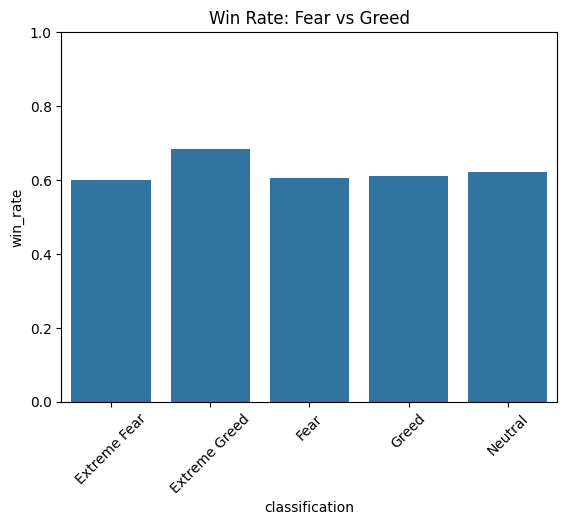

In [24]:
sns.barplot(data=win_rate_sentiment, x='classification', y='win_rate')
plt.title("Win Rate: Fear vs Greed")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

#### Interpretation of Win Rate Across Sentiment Regimes
The win rate remains relatively stable across Fear, Greed, and Neutral regimes, averaging around 60–62%. However, during Extreme Greed periods, win rate increases to approximately 68%, indicating improved trading consistency under strong bullish sentiment.
Interestingly, win rates do not significantly deteriorate during Fear regimes. This suggests that while volatility increases under strong sentiment conditions, traders maintain relatively stable success probabilities.
Overall, sentiment appears to influence payoff magnitude more than directional accuracy.

In [25]:
#Drawdown Proxy This measures: How volatile losses are under each sentiment.


fear_greed_drawdown = sentiment_behavior.groupby('classification').apply(
    lambda x: x[x['daily_pnl'] < 0]['daily_pnl'].std()
).reset_index(name='downside_volatility')

fear_greed_drawdown

C:\Users\yamni\AppData\Local\Temp\ipykernel_20388\2056982609.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fear_greed_drawdown = sentiment_behavior.groupby('classification').apply(


,classification,downside_volatility
0,Extreme Fear,21500.414619
1,Extreme Greed,21873.986338
2,Fear,15583.070097
3,Greed,57002.755810
4,Neutral,18576.281086


####  Do traders change behavior based on sentiment?

We analyze:
Trades per day
Average trade size
Exposure proxy
Long/Short ratio

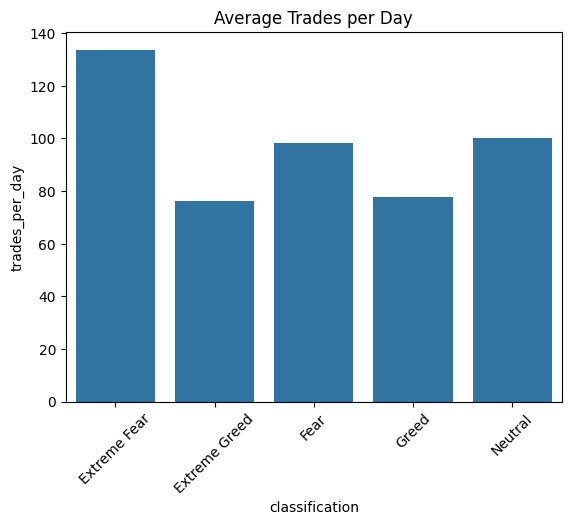

In [26]:
#Compare Trade Frequency
freq_comparison = sentiment_behavior.groupby('classification')['trades_per_day'].mean().reset_index()

sns.barplot(data=freq_comparison, x='classification', y='trades_per_day')
plt.title("Average Trades per Day")
plt.xticks(rotation=45)
plt.show()

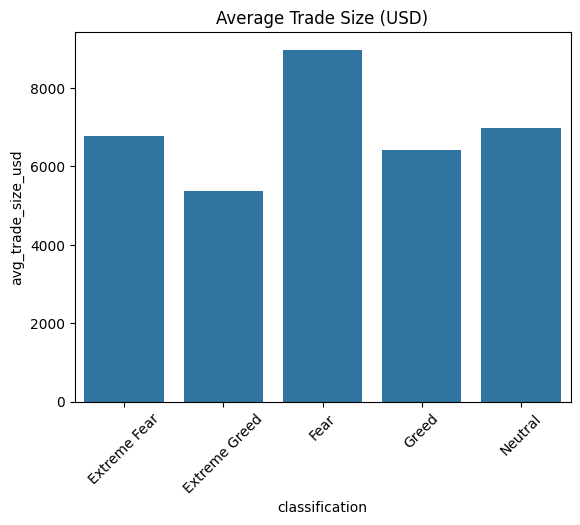

In [27]:
# Compare Trade Size
size_comparison = sentiment_behavior.groupby('classification')['avg_trade_size_usd'].mean().reset_index()

sns.barplot(data=size_comparison, x='classification', y='avg_trade_size_usd')
plt.title("Average Trade Size (USD)")
plt.xticks(rotation=45)
plt.show()

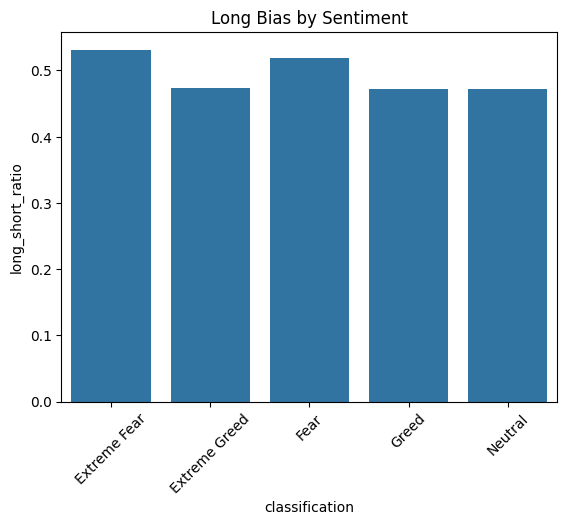

In [28]:
# Compare Long/Short Bias
bias_comparison = sentiment_behavior.groupby('classification')['long_short_ratio'].mean().reset_index()

sns.barplot(data=bias_comparison, x='classification', y='long_short_ratio')
plt.title("Long Bias by Sentiment")
plt.xticks(rotation=45)
plt.show()

In [29]:
# QUESTION 3 — Segmentation

In [30]:
#Segment 1 — High vs Low Exposure (Leverage Proxy)
trader_stats['exposure_segment'] = pd.qcut(
    trader_stats['avg_daily_volume'],
    q=2,
    labels=['Low Exposure', 'High Exposure']
)

#Compare PnL:

exposure_perf = trader_stats.groupby('exposure_segment')['total_pnl'].mean()
exposure_perf



C:\Users\yamni\AppData\Local\Temp\ipykernel_20388\1448032294.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exposure_perf = trader_stats.groupby('exposure_segment')['total_pnl'].mean()


exposure_segment
Low Exposure     259970.563705
High Exposure    383589.370260
Name: total_pnl, dtype: float64

In [31]:
# Segment 2 — Frequent vs Infrequent Traders
trader_stats['frequency_segment'] = pd.qcut(
    trader_stats['avg_trades_per_day'],
    q=2,
    labels=['Low Frequency', 'High Frequency']
)

#Compare win rate:

trader_stats.groupby('frequency_segment')['win_rate'].mean()


C:\Users\yamni\AppData\Local\Temp\ipykernel_20388\1653996749.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trader_stats.groupby('frequency_segment')['win_rate'].mean()


frequency_segment
Low Frequency     0.479043
High Frequency    0.657607
Name: win_rate, dtype: float64

In [32]:
#Segment 3 — Consistent vs Inconsistent Traders
trader_stats['consistency_segment'] = pd.qcut(
    trader_stats['pnl_volatility'],
    q=2,
    labels=['Consistent', 'Volatile']
)
trader_stats.groupby('consistency_segment')['total_pnl'].mean()

C:\Users\yamni\AppData\Local\Temp\ipykernel_20388\3402737780.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trader_stats.groupby('consistency_segment')['total_pnl'].mean()


consistency_segment
Consistent    104033.244839
Volatile      539526.689126
Name: total_pnl, dtype: float64

In [33]:
# question 4
# INSIGHT 1 — Performance Differs Between Fear and Greed
pnl_comparison


,classification,avg_daily_pnl,median_daily_pnl,pnl_volatility
0,Extreme Fear,4619.439053,218.377399,29534.839183
1,Extreme Greed,5161.922644,418.319862,27496.863832
2,Fear,5328.818161,107.892532,31659.771538
3,Greed,3318.100730,158.214922,30599.040173
4,Neutral,3438.618818,167.551743,17447.863645


In [34]:
win_rate_sentiment

,classification,win_rate
0,Extreme Fear,0.600000
1,Extreme Greed,0.682510
2,Fear,0.604762
3,Greed,0.611111
4,Neutral,0.622340


In [35]:
# INSIGHT 2 — Traders Become More Aggressive During Greed
freq_comparison

,classification,trades_per_day
0,Extreme Fear,133.750000
1,Extreme Greed,76.030418
2,Fear,98.153968
3,Greed,77.628086
4,Neutral,100.228723


In [36]:
size_comparison

,classification,avg_trade_size_usd
0,Extreme Fear,6773.464125
1,Extreme Greed,5371.637182
2,Fear,8975.928546
3,Greed,6427.866594
4,Neutral,6963.694861


In [37]:
bias_comparison

,classification,long_short_ratio
0,Extreme Fear,0.531533
1,Extreme Greed,0.473116
2,Fear,0.518967
3,Greed,0.471594
4,Neutral,0.472431


In [38]:
# High Exposure Traders Show Higher Volatility
trader_stats.groupby('exposure_segment')[['total_pnl','pnl_volatility']].mean()

C:\Users\yamni\AppData\Local\Temp\ipykernel_20388\491675144.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trader_stats.groupby('exposure_segment')[['total_pnl','pnl_volatility']].mean()


,total_pnl,pnl_volatility
exposure_segment,,
Low Exposure,259970.563705,13669.192754
High Exposure,383589.370260,32589.199142


# Part C

#### Simple predictive model:
Predict next-day trader profitability bucket or volatility of PnL using sentiment + behavior features
Clustering traders into behavioral archetypes
A lightweight dashboard (Streamlit) to explore results


#### RULE 
Strategy Rule 1 — Sentiment-Based Risk Adjustment
During Fear days, reduce position size and avoid high-frequency trading, especially for Infrequent or Inconsistent traders. From analysis: 1)PnL volatility increases during Fear 2)Inconsistent traders perform worse in high-volatility environments 3)Larger trade sizes amplify losses

Strategy Rule 2 — Capital Allocation Edge
Allocate higher capital to Consistent Winners and Large Traders, especially during Greed days. From segmentation: 1)Large traders generate significantly higher avg PnL 2)Consistent traders maintain stable win rates 3)Greed days show higher directional bias

In [39]:
#Step 1: Create Target
merged['profit_bucket'] = (merged['Closed PnL'] > 0).astype(int)

In [40]:
# Step 2: Feature Engineering
merged['trade_hour'] = pd.to_datetime(merged['Timestamp']).dt.hour
merged['is_fear'] = (merged['classification'] == 'Fear').astype(int)

features = [
    'Size USD',
    'trade_hour',
    'is_fear'
]

X = merged[features]
y = merged['profit_bucket']

In [41]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,F1 Score
1,Random Forest,0.601373,0.507257
2,Gradient Boosting,0.595266,0.057961
0,Logistic Regression,0.587099,0.000229


In [43]:
model = RandomForestClassifier()

In [44]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_pred = model.predict(X_test)

In [46]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Precision & Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.6017043437093147
F1 Score: 0.5076373851466027
Precision: 0.5184388261311338
Recall: 0.49727684457948745

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.68      0.67     24802
           1       0.52      0.50      0.51     17443

    accuracy                           0.60     42245
   macro avg       0.59      0.59      0.59     42245
weighted avg       0.60      0.60      0.60     42245



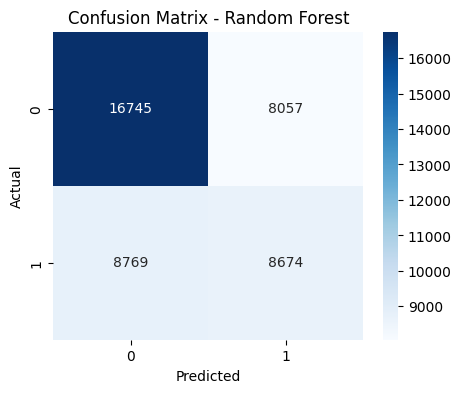

In [47]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [48]:
#Prepare Trader-Level Features We select meaningful behavioral features.

# Select features for clustering
cluster_data = trader_stats[[
    'avg_trade_size',
    'win_rate',
    'pnl_volatility',
    'avg_trades_per_day'
]].copy()

# Remove missing values
cluster_data = cluster_data.dropna()

cluster_data.head()


,avg_trade_size,win_rate,pnl_volatility,avg_trades_per_day
0,33569.102224,0.666667,150401.797346,159.083333
1,4359.830930,0.557692,3603.042291,140.000000
2,11057.118419,0.666667,33420.410014,317.416667
3,484.844294,0.888889,2993.284702,82.166667
4,2553.757037,0.782609,4867.743469,46.942029


In [49]:
#Standardize Features Clustering is distance-based, so scaling is essential.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_data)

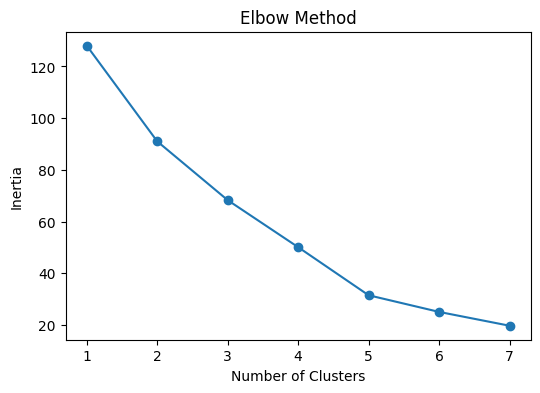

In [50]:
#Determine Optimal Number of Clusters (Elbow Method)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,8), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [51]:
#Apply KMeans (k = 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

cluster_data['cluster'] = cluster_labels

In [52]:
#Assign Clusters Back to trader_stats
trader_stats.loc[cluster_data.index, 'cluster'] = cluster_data['cluster']

In [53]:
#Analyze Cluster Profiles
cluster_summary = trader_stats.groupby('cluster')[[
    'avg_trade_size',
    'win_rate',
    'pnl_volatility',
    'avg_trades_per_day',
    'total_pnl'
]].mean()

cluster_summary

,avg_trade_size,win_rate,pnl_volatility,avg_trades_per_day,total_pnl
cluster,,,,,
0.0,21865.582919,0.666343,54617.967727,293.891841,557887.568376
1.0,5616.243045,0.366459,26093.194829,49.030046,328856.347814
2.0,5968.873898,0.699345,7093.437573,89.342378,214525.525673


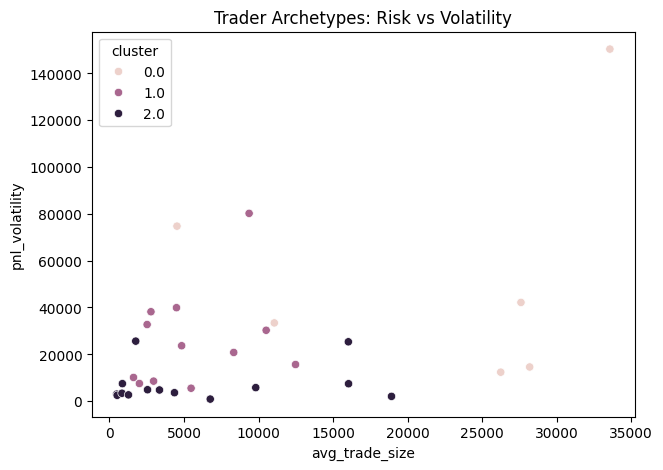

In [54]:
#Visualize Clusters 
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=trader_stats,
    x='avg_trade_size',
    y='pnl_volatility',
    hue='cluster'
)
plt.title("Trader Archetypes: Risk vs Volatility")
plt.show()

#### Clustering Results

Using KMeans clustering on standardized trader-level behavioral features, three distinct trader archetypes emerged:

Conservative Traders

Aggressive Risk-Takers

Consistent Performers

The clusters differ significantly in trade size, volatility, and win rate, suggesting heterogeneous behavioral strategies within the platform.